# Decision Tree Implementation

### PreProcess Data

In [35]:
import SL_API as pre
import imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
imp.reload(pre)
X_test, y_test, X_train_split, y_train_split, X_valid, y_valid, X_train, y_train = pre.PreProcessData()
modelAnalyzer = pre.ModelAnalysis()

### Class Construction

In [52]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))

        # Check termination conditions
        if depth == self.max_depth or num_classes == 1:
            # Instead of returning the most common class, return the class distribution
            class_counts = np.bincount(y, minlength=num_classes)
            class_probabilities = class_counts / len(y)
            return class_probabilities  # Return probabilities instead of a single class

        # Find the best split
        best_split = self._find_best_split(X, y)

        if best_split['impurity'] == 0:
            # If there's no impurity, return the class distribution
            class_counts = np.bincount(y, minlength=num_classes)
            class_probabilities = class_counts / len(y)
            return class_probabilities

        left_indices = X[:, best_split['feature_index']] <= best_split['threshold']
        right_indices = ~left_indices

        # Recursively build the left and right subtrees
        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return {'feature_index': best_split['feature_index'],
                'threshold': best_split['threshold'],
                'left': left_subtree,
                'right': right_subtree}

    def _calculate_gini(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        gini = 1 - np.sum(probabilities ** 2)
        return gini

    def _find_best_split(self, X, y):
        num_samples, num_features = X.shape
        best_split = {'impurity': None}
        best_gini = float('inf')

        for feature_index in range(num_features):
            thresholds = np.unique(X[:, feature_index])

            for threshold in thresholds:
                left_indices = X[:, feature_index] <= threshold
                right_indices = ~left_indices

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                left_gini = self._calculate_gini(y[left_indices])
                right_gini = self._calculate_gini(y[right_indices])

                gini = (len(y[left_indices]) / num_samples) * left_gini \
                       + (len(y[right_indices]) / num_samples) * right_gini

                if gini < best_gini:
                    best_split = {'feature_index': feature_index,
                                  'threshold': threshold,
                                  'impurity': gini}
                    best_gini = gini

        return best_split


    def predict(self, X):
        classPredictions = [self._traverse_tree(x, self.tree) for x in X]
        predictions = []
        for pred in classPredictions:
            predictions.append(1-pred[0])
        return predictions

    def _traverse_tree(self, x, node):
        if isinstance(node, np.ndarray):  # If it's a probability distribution
            return node  # Return the class probabilities

        if isinstance(node, dict):
            if x[node['feature_index']] <= node['threshold']:
                return self._traverse_tree(x, node['left'])
            else:
                return self._traverse_tree(x, node['right'])
        else:
            raise ValueError("Invalid node structure")

### Max Depth of 1

Accuracy: 0.6406984553391538
F1 Score: 0.7810069586573885
Precision: 0.6406984553391538
NPV: 0.0
Recall: 1.0
Specificity: 0.0
None


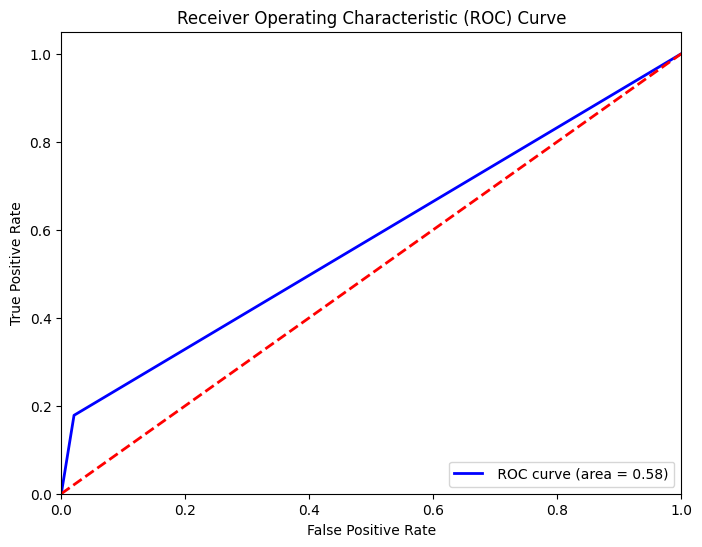

In [70]:
tree1 = DecisionTree(max_depth=1)
tree1.fit(np.array(X_train), np.array(y_train))
predictions1 = tree1.predict(np.array(X_valid))
modelAnalyzer.printPrediction(predictions1, y_valid)
modelAnalyzer.plot_roc_auc(predictions1, y_valid)

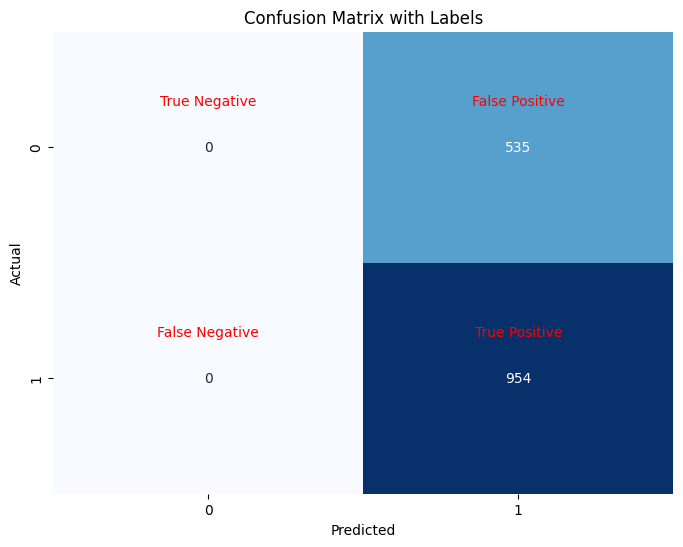

In [71]:
modelAnalyzer.plot(predictions1, y_valid)

### Max Depth of 3

Accuracy: 0.6836803223640027
F1 Score: 0.7871667419792137
Precision: 0.6918189038919778
NPV: 0.6391304347826087
Recall: 0.9129979035639413
Specificity: 0.27476635514018694
None


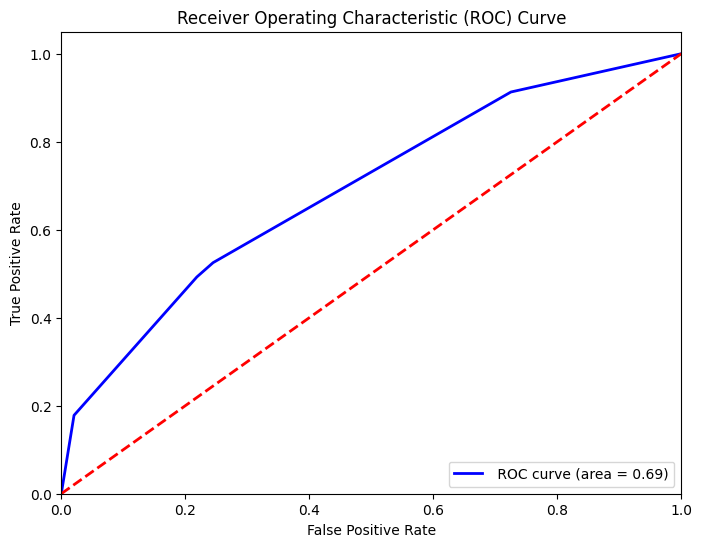

In [72]:
tree3 = DecisionTree(max_depth=3)
tree3.fit(np.array(X_train), np.array(y_train))
predictions3 = tree3.predict(np.array(X_valid))
modelAnalyzer.printPrediction(predictions3, y_valid)
modelAnalyzer.plot_roc_auc(predictions3, y_valid)

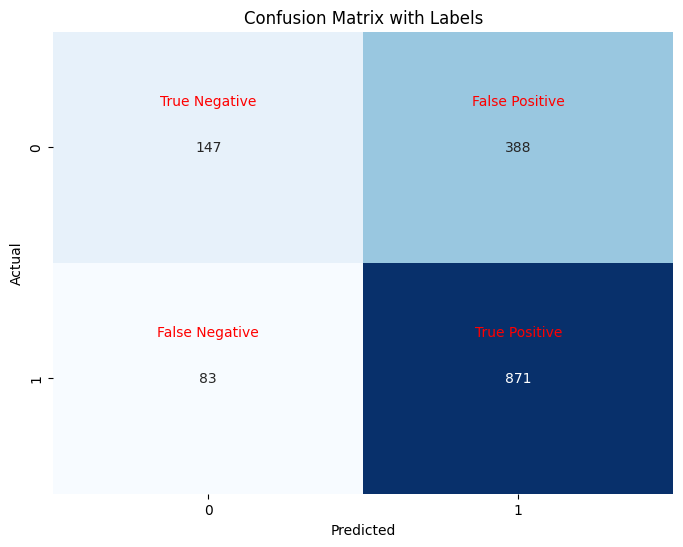

In [73]:
modelAnalyzer.plot(predictions3, y_valid)

### Max Depth of 6

Accuracy: 0.6957689724647415
F1 Score: 0.7675731144176501
Precision: 0.7517587939698492
NPV: 0.582995951417004
Recall: 0.7840670859538784
Specificity: 0.5383177570093458
None


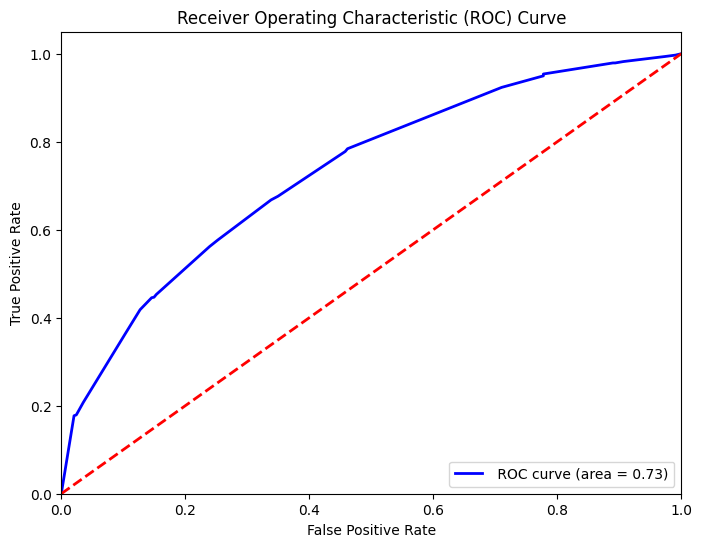

In [74]:
tree6 = DecisionTree(max_depth=6)
tree6.fit(np.array(X_train), np.array(y_train))
predictions6 = tree6.predict(np.array(X_valid))
modelAnalyzer.printPrediction(predictions6, y_valid)
modelAnalyzer.plot_roc_auc(predictions6, y_valid)

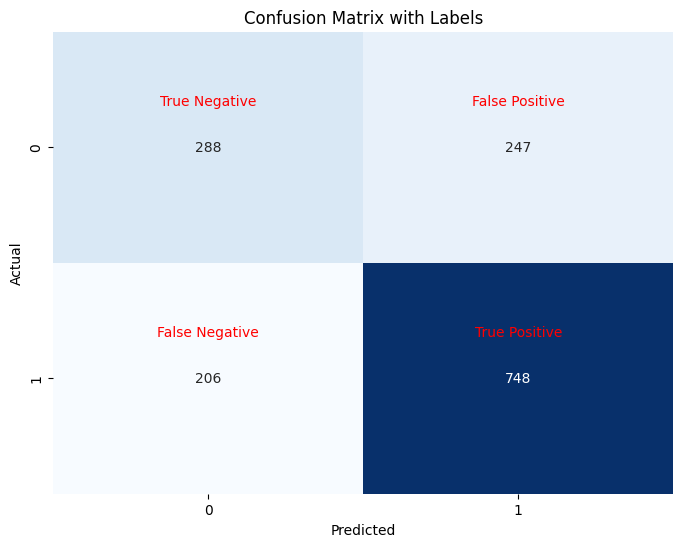

In [75]:
modelAnalyzer.plot(predictions6, y_valid)

### Max Depth of 8

Accuracy: 0.6991269308260577
F1 Score: 0.7704918032786885
Precision: 0.7535070140280561
NPV: 0.5885947046843177
Recall: 0.7882599580712788
Specificity: 0.5401869158878505
None


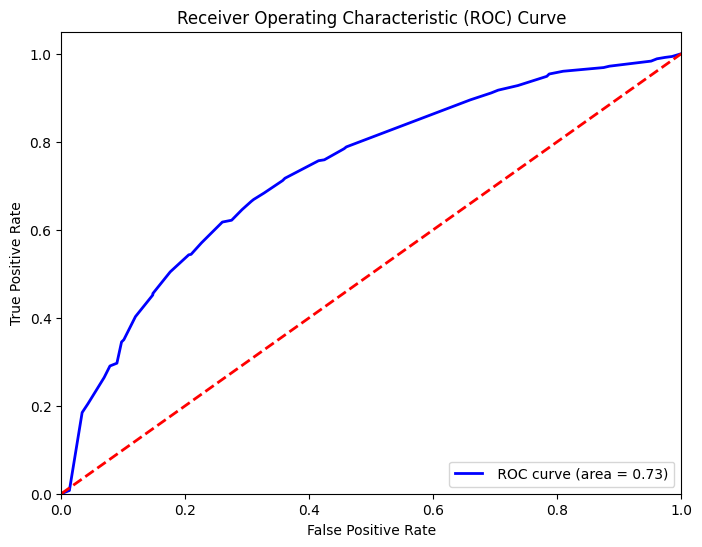

In [76]:
tree8 = DecisionTree(max_depth=8)
tree8.fit(np.array(X_train), np.array(y_train))
predictions8 = tree8.predict(np.array(X_valid))
modelAnalyzer.printPrediction(predictions8, y_valid)
modelAnalyzer.plot_roc_auc(predictions8, y_valid)

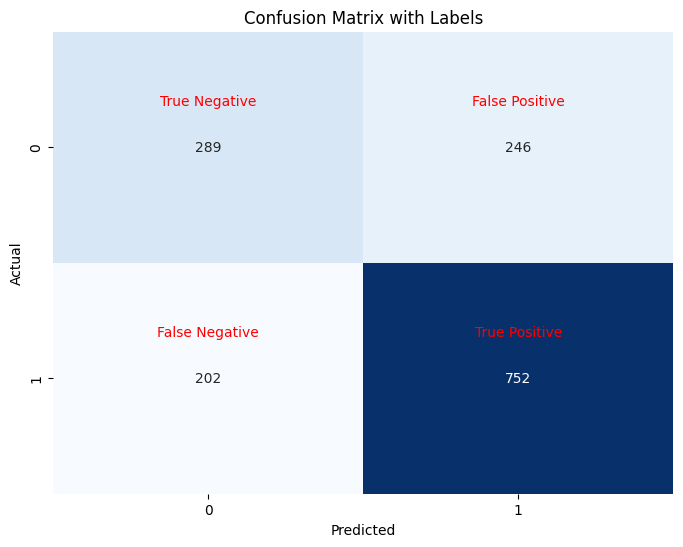

In [77]:
modelAnalyzer.plot(predictions8, y_valid)

### Max Depth of 9

Accuracy: 0.6897246474143721
F1 Score: 0.7588726513569938
Precision: 0.7557172557172557
NPV: 0.5692599620493358
Recall: 0.7620545073375262
Specificity: 0.5607476635514018
None


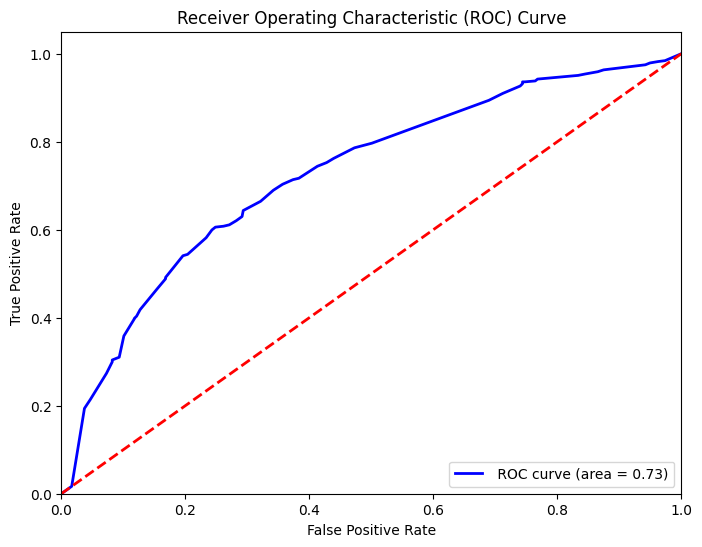

In [78]:
tree9 = DecisionTree(max_depth=9)
tree9.fit(np.array(X_train), np.array(y_train))
predictions9 = tree9.predict(np.array(X_valid))
modelAnalyzer.printPrediction(predictions9, y_valid)
modelAnalyzer.plot_roc_auc(predictions9, y_valid)

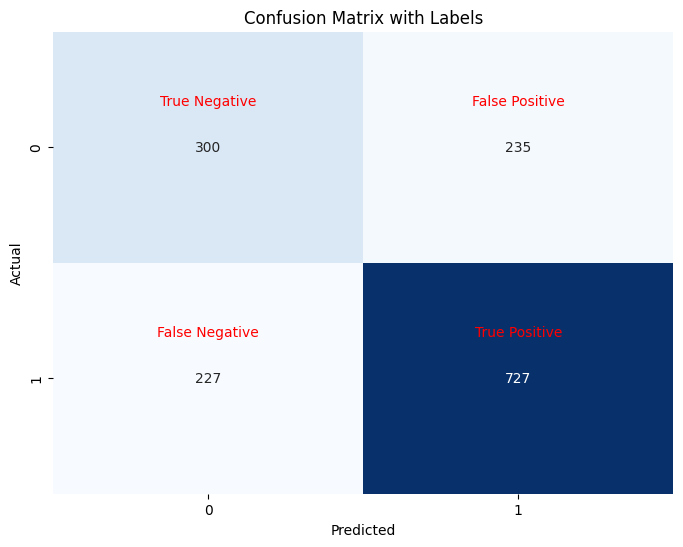

In [79]:
modelAnalyzer.plot(predictions9, y_valid)

### Make the best Model have a Higher (recall/specificity ratio) with Youden index

In [80]:
best_threshold = modelAnalyzer.youdenIndex(predictions8, y_valid)
modelAnalyzer.printPrediction(predictions8, y_valid, threshold=best_threshold)

Model Logistic Regression: Best Threshold = 0.667, Youden Index = 0.358
Accuracy: 0.6762928139691068
F1 Score: 0.725824800910125
Precision: 0.7935323383084577
NPV: 0.5386861313868613
Recall: 0.6687631027253669
Specificity: 0.6897196261682244


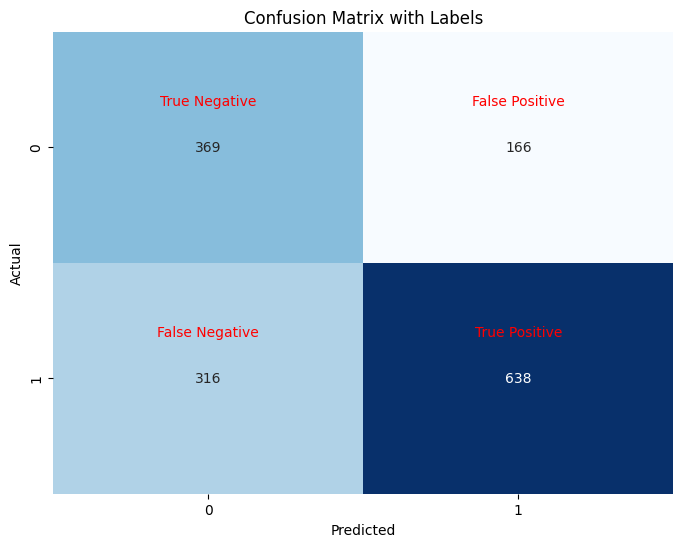

In [81]:
modelAnalyzer.plot(predictions8, y_valid, threshold=best_threshold)

### Test Model on Test Data

Accuracy: 0.7011417058428475
F1 Score: 0.7849202513291444
Precision: 0.7269471799462847
NPV: 0.6236559139784946
Recall: 0.8529411764705882
Specificity: 0.43202979515828677
None


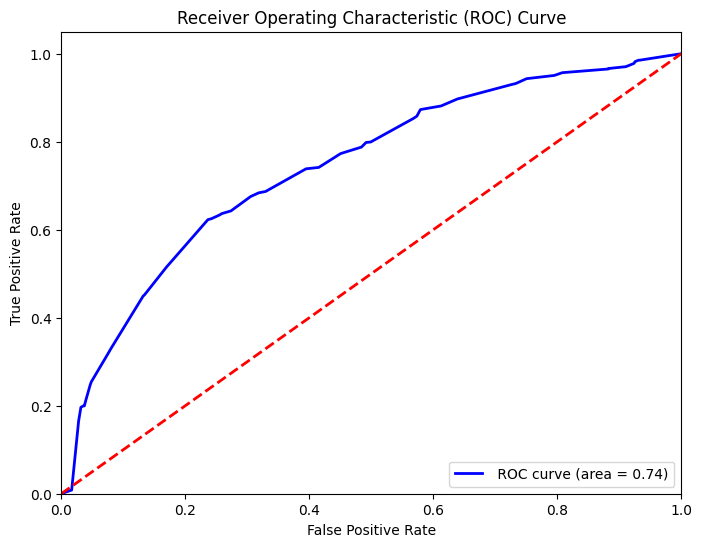

In [83]:
tree8Test = DecisionTree(max_depth=8)
tree8Test.fit(np.array(X_train_split), np.array(y_train_split))
predictions8Test = tree8Test.predict(np.array(X_test))
modelAnalyzer.printPrediction(predictions8Test, y_test)
modelAnalyzer.plot_roc_auc(predictions8Test, y_test)

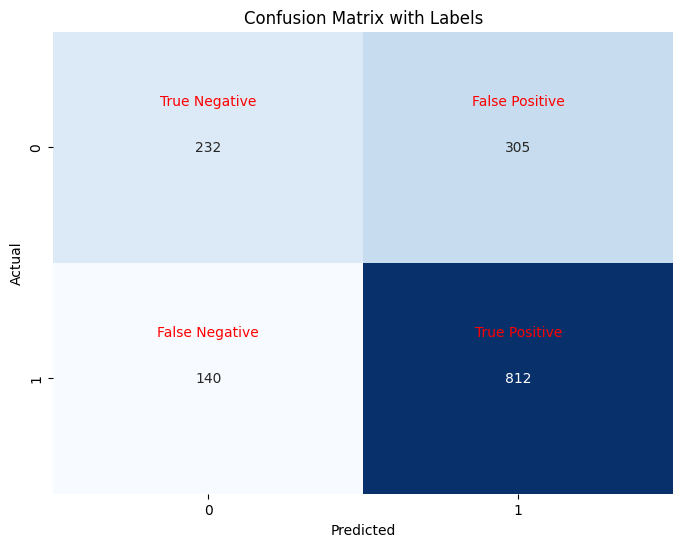

In [84]:
modelAnalyzer.plot(predictions8Test, y_test)